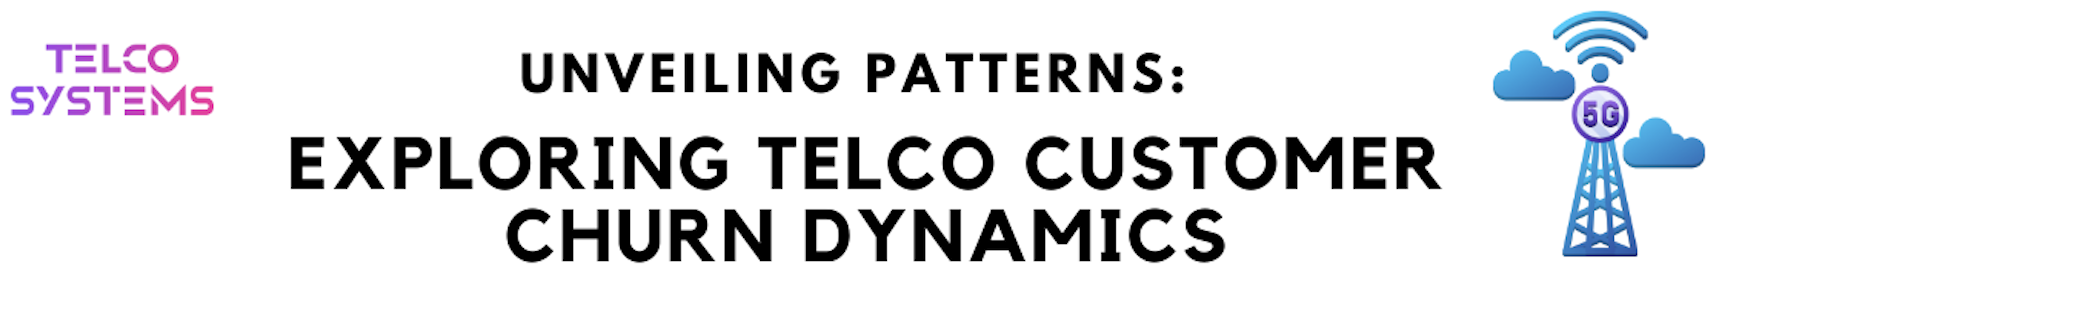

# Table of Contents

1. [Introduction](#introduction)
2. [Project Goal](#project_goal)
3. [Data Acquisition](#acquisition)
4. [Data Preparation](#preparation)
5. [Data Exploration](#exploration)


# 1. Introduction <a name="introduction"></a>



According to TechSee's report based on a 2019 survey result,39% of Americans canceled their telecom contracts due to unsatisfied customer service (TechSee Augmented Vision Ltd., 2022).

Reactive retention strategies are shown to be ineffective, instead, proactive efforts are key. Among those who churned following a negative service experience, 40% would have changed their mind if they had been offered a better service plan, and 33% would have stayed if they had believed that the telco’s service would improve in the future (TechSee Augmented Vision Ltd., 2022).

 # 2. Project Goal <a name="project_goal"></a>

This research will investigate the main drivers for customers' churning at Telco, a tele-comm service provider, by developing a ML classification model in order to predict the churning pattern of a customer, and therefore implementing proactive measures to prevent the churning before it happens.

# 3. Data Acquisition <a name="acquisition"></a>

- Data source is non-public; acquired from MySQL Codeup DB Server(Telco_churn Database) with credentials that are stored in env.py

- The whole "Telco_churn" Database has 10 tables, 106 columns (including duplicated columns)

- Used MySQL command (shown cell below) to join all the tables together and exported as "telco_raw.csv"

- Used Excel to delete all the duplicated columns

- The final raw dataset has 7043 rows and 25 non-duplicated columns

In [ ]:
# My SQL code for joining all the tables in Telco_churn Database:
'''
use telco_churn;
SELECT *
FROM customers
LEFT JOIN contract_types ON customers.contract_type_id = contract_types.contract_type_id
LEFT JOIN customer_churn ON customers.customer_id = customer_churn.customer_id
LEFT JOIN customer_contracts ON customers.customer_id = customer_contracts.customer_id
LEFT JOIN customer_details ON customers.customer_id = customer_details.customer_id
LEFT JOIN customer_payments ON customers.customer_id = customer_payments.customer_id
LEFT JOIN customer_signups ON customers.customer_id = customer_signups.customer_id
LEFT JOIN customer_subscriptions ON customers.customer_id = customer_subscriptions.customer_id
LEFT JOIN internet_service_types ON customer_subscriptions.internet_service_type_id = internet_service_types.internet_service_type_id
LEFT JOIN payment_types ON customers.payment_type_id = payment_types.payment_type_id;

'''

In [217]:
import acquire as a # acquire.py is a file that stores a function "get_telco_data" to retrieve data from my local .csv file if it exists;
                    #if this file does not exist locally,it will run a pd.read_sql() function to retreive data from MySQL database

telco = a.get_telco_data() # In this case, there is a local telco_raw.csv file in my working directory, so it retrieves locally.             

this file exists, reading from csv


In [218]:
telco.info()
telco.columns

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    7043 non-null   object 
 1   senior_citizen            7043 non-null   int64  
 2   partner                   7043 non-null   object 
 3   dependents                7043 non-null   object 
 4   tenure                    7043 non-null   int64  
 5   phone_service             7043 non-null   object 
 6   multiple_lines            7043 non-null   object 
 7   internet_service_type_id  7043 non-null   int64  
 8   online_security           7043 non-null   object 
 9   online_backup             7043 non-null   object 
 10  device_protection         7043 non-null   object 
 11  tech_support              7043 non-null   object 
 12  streaming_tv              7043 non-null   object 
 13  streaming_movies          7043 non-null   object 
 14

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'churn_month', 'signup_date',
       'internet_service_type', 'payment_type'],
      dtype='object')

# 4. Data Preparation <a name="preparation"></a>

- Identify and replace NaNs in the dataset.
- Checked for nulls in the data (there were none)
- Checked column data types and convert to the proper type (total_charges column from object to float)
- Clean up columns and remove duplciates


> # 4.1 Identify NaN values and interpret them

- For NaNs in "internet_service_type" column, it means "No internet service",and therefore were replaced as such.

- For NaNs in "churn_month", it means "Not_churned", and were replaced as such.

In [219]:
telco_na = telco.isna().sum()
telco_na[telco_na > 0]

churn_month              5174
internet_service_type    1526
dtype: int64

In [220]:
# interpret the NaNs in internet_service_type column

print(telco.internet_service_type.value_counts(dropna=False)) 
print()
print(telco.internet_service_type_id.value_counts(dropna=False))
print()
print(telco.online_security.value_counts(dropna=False))
print()
print(telco.online_backup.value_counts(dropna=False))
print()
print(telco.device_protection.value_counts(dropna=False))
print()
print(telco.tech_support.value_counts(dropna=False))
print()
print(telco.streaming_tv.value_counts(dropna=False))
print()
print(telco.streaming_movies.value_counts(dropna=False))


internet_service_type
Fiber optic    3096
DSL            2421
NaN            1526
Name: count, dtype: int64

internet_service_type_id
2    3096
1    2421
3    1526
Name: count, dtype: int64

online_security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

online_backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

device_protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

tech_support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

streaming_tv
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

streaming_movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


In [221]:
# interpret the NaNs in churn_month column

print(telco.churn_month.value_counts(dropna=False)) 
print()
print(telco.churn.value_counts(dropna=False))
print()

churn_month
NaN        5174
1/31/22    1869
Name: count, dtype: int64

churn
No     5174
Yes    1869
Name: count, dtype: int64



In [222]:
# replace NaNs with corresponding names in internet_service_type

telco['internet_service_type']=telco['internet_service_type'].fillna('No internet service')
telco['internet_service_type'].value_counts()

internet_service_type
Fiber optic            3096
DSL                    2421
No internet service    1526
Name: count, dtype: int64

In [223]:
# replace NaNs with corresponding names in churn_month
telco['churn_month']=telco['churn_month'].fillna('not churned')
telco['churn_month'].value_counts()

churn_month
not churned    5174
1/31/22        1869
Name: count, dtype: int64

> # 4.2 Check for null values

In [224]:
telco.isnull().sum()

gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
internet_service_type_id    0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
contract_type_id            0
paperless_billing           0
payment_type_id             0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
churn_month                 0
signup_date                 0
internet_service_type       0
payment_type                0
dtype: int64

> # 4.3 Check data types

In [225]:
print(telco.head())
print()
telco.dtypes

             gender  senior_citizen partner dependents  tenure phone_service  \
customer_id                                                                    
0002-ORFBO   Female               0     Yes        Yes       9           Yes   
0003-MKNFE     Male               0      No         No       9           Yes   
0004-TLHLJ     Male               0      No         No       4           Yes   
0011-IGKFF     Male               1     Yes         No      13           Yes   
0013-EXCHZ   Female               1     Yes         No       3           Yes   

            multiple_lines  internet_service_type_id online_security  \
customer_id                                                            
0002-ORFBO              No                         1              No   
0003-MKNFE             Yes                         1              No   
0004-TLHLJ              No                         2              No   
0011-IGKFF              No                         2              No   
0013-EX

gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
churn_month                  object
signup_date                  object
internet_service_type        object
payment_type                 object
dtype: object

In [226]:
telco['total_charges'].value_counts()

total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64

In [227]:
# interpret the '' in total_charges column
print(telco.tenure.value_counts().sort_values())
print()
print(telco.total_charges.value_counts())

tenure
0      11
36     50
44     51
39     56
28     57
     ... 
4     176
3     200
2     238
72    362
1     613
Name: count, Length: 73, dtype: int64

total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64


In [228]:
# replace '' in total_charges column with 0
# convert total_charges from object to float

telco.total_charges = telco.total_charges.replace(' ','0.0')
telco.total_charges = telco.total_charges.astype(float)

In [229]:
telco.dtypes

gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges               float64
churn                        object
contract_type                object
churn_month                  object
signup_date                  object
internet_service_type        object
payment_type                 object
dtype: object

> # 4.4 Clean up columns
- remove duplicates

In [230]:
telco=telco.drop(['payment_type_id'],axis =1)
telco=telco.drop(['contract_type_id'],axis =1)
telco=telco.drop(['internet_service_type_id'],axis =1)

> # 4.5 Split the dataset to train, validate and and test

In [231]:
from sklearn.model_selection import train_test_split
#first split
train, validate_test = train_test_split(telco, 
                train_size=0.60, #size of the train df, and the test size will default to 1-train_size
                random_state=123, #set any number here for consistency
                 stratify=telco['churn'] #need to stratify on target variable
                )
    
#second split
validate, test = train_test_split(validate_test, #this is the df that we are splitting now
                test_size=0.50, #set test or train size to 50%
                 random_state=123, #gotta send in a random seed
                stratify=validate_test['churn']#still got to stratify
                )
    

# 5. Data Exploration <a name="exploration"></a>

> # 5.1 Churn vs. Not churn datasets

>>### Question 1: How many customers have churned?

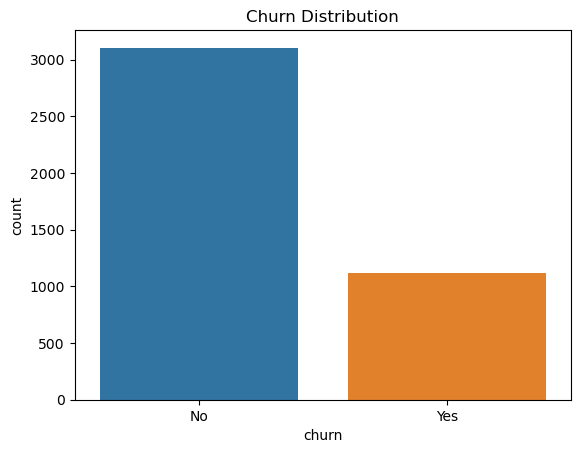

In [241]:
sns.countplot(x='churn', data=train)
plt.title('Churn Distribution')
plt.show()

In [233]:
# Drop unnecessary columns
train = train.drop(['churn_month'], axis=1)

# split train dataset by churn/ not churn
churn = train[train.churn == 'Yes']
notchurn = train[train.churn != 'Yes']
len(churn) + len(notchurn) == len(train)

True

> # 5.1.1 Continuous variables explorations

>### Question  2: How do monthly charges, total charges and tenure affect churn?
>>- Customers that have churned tend to have higher monthly charges, lower tenure and lower total charges;
>> - Tenure seems to have a stronger impact on churn status than monthly charges
>> - Total charges do not seem to directly relate to churn status,as it is a result of monthly charges and tenure's multiplication. Be careful with the spurious correlation.

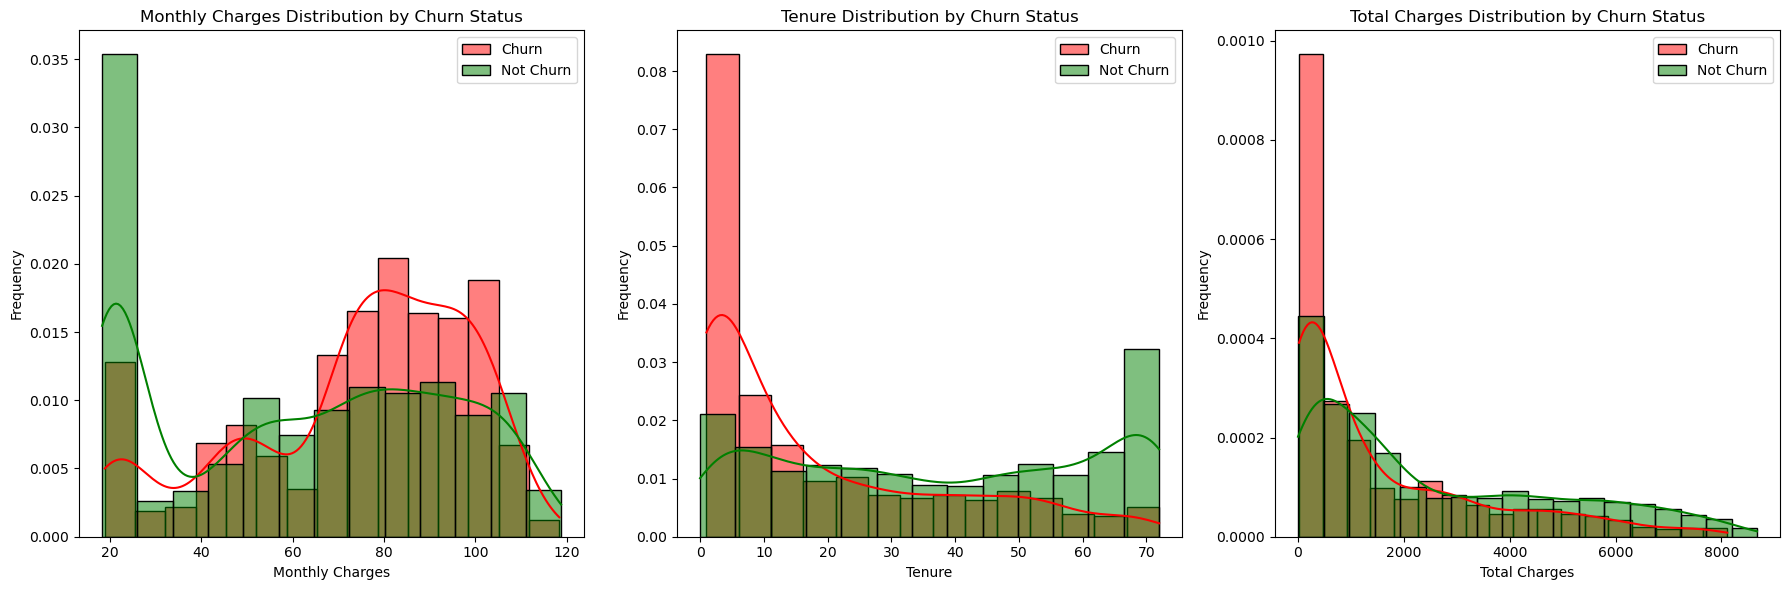

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'churn' and 'notchurn' are your DataFrames

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot Monthly Charges
sns.histplot(churn['monthly_charges'], label='Churn', kde=True, color='red', alpha=0.5, stat='density', ax=axes[0])
sns.histplot(notchurn['monthly_charges'], label='Not Churn', kde=True, color='green', alpha=0.5, stat='density', ax=axes[0])
axes[0].set_title('Monthly Charges Distribution by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot Tenure
sns.histplot(churn['tenure'], label='Churn', kde=True, color='red', alpha=0.5, stat='density', ax=axes[1])
sns.histplot(notchurn['tenure'], label='Not Churn', kde=True, color='green', alpha=0.5, stat='density', ax=axes[1])
axes[1].set_title('Tenure Distribution by Churn Status')
axes[1].set_xlabel('Tenure')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Plot Total Charges
sns.histplot(churn['total_charges'], label='Churn', kde=True, color='red', alpha=0.5, stat='density', ax=axes[2])
sns.histplot(notchurn['total_charges'], label='Not Churn', kde=True, color='green', alpha=0.5, stat='density', ax=axes[2])
axes[2].set_title('Total Charges Distribution by Churn Status')
axes[2].set_xlabel('Total Charges')
axes[2].set_ylabel('Frequency')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


> ## T-Test on 'monthly_charges' and 'tenure' vs. 'churn' / 'not churn'

In [271]:
from scipy import stats


In [256]:
# monthly charges on churn vs. monthly charges on not churn #

# 2-sample 1-tail T-test
Ho = 'monthly charges for churned customers are not higher than non-churned customers'
Ha = 'monthly charges for churned customers are higher than non-churned customers'
alpha = 0.05

# Test for normal distribution, since both datasets have more than 500 samples, they pass normality test
print(len(churn)>500)
print(len(notchurn)>500)

# Test for equal variances. Since the 2 datasets do not pass equal variance test, will use equal_var = False argument
print(churn.monthly_charges.var() == notchurn.monthly_charges.var())

# Test for independence: both datasets are independent from each other, as no observations in the churn sample exist in the not churn sample

# independent t-test
t, p = stats.ttest_ind(churn.monthly_charges, notchurn.monthly_charges, equal_var=False)
t, p

if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print(f'We reject the null hypothesis, with pvalue={p}, we conclude {Ha}')


True
True
False
We reject the null hypothesis, with pvalue=3.902002806769788e-41, we conclude monthly charges for churned customers are higher than non-churned customers


In [267]:
# tenure on churn vs. tenure on not churn #

# 2-sample 1-tail T-test
Ho = 'tenure for churned customers are not lower than non-churned customers'
Ha = 'tenure for churned customers are lower than non-churned customers'
alpha = 0.05

# Test for normal distribution, since both datasets have more than 500 samples, they pass normality test
print(len(churn)>500)
print(len(notchurn)>500)

# Test for equal variances. Since the 2 datasets do not pass equal variance test, will use equal_var = False argument
print(churn.tenure.var() == notchurn.tenure.var())

# Test for independence: both datasets are independent from each other, as no observations in the churn sample exist in the not churn sample

# independent t-test
t, p = stats.ttest_ind(notchurn.tenure,churn.tenure,equal_var=False)
print(t, p)

if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print(f'We reject the null hypothesis, with pvalue={p}, we conclude {Ha}')


True
True
False
26.79629948967026 1.3308231278358085e-138
We reject the null hypothesis, with pvalue=1.3308231278358085e-138, we conclude tenure for churned customers are lower than non-churned customers


> # 5.1.2 Categorical variables exploration
>># Question 3: How are the categorical variables affect churn?
>>> - For customers that do have internet service, the ones that choose fiber optics tend to churn,the ones that have no internet service are least likely to churn.
>>> - Among all support options (online security, online backup, device protection, tech support), customers that opt No to support are most likely tend to churn, customers that have no internet service are least likely tp churn
>>> - Customers that have month-to-month contract are most likely to churn, customers sign 2-year contract are least likely to churn
>>> - Customers choose paperless biling are more likely to churn
>>> - customers choose electric check are most likely to churn.

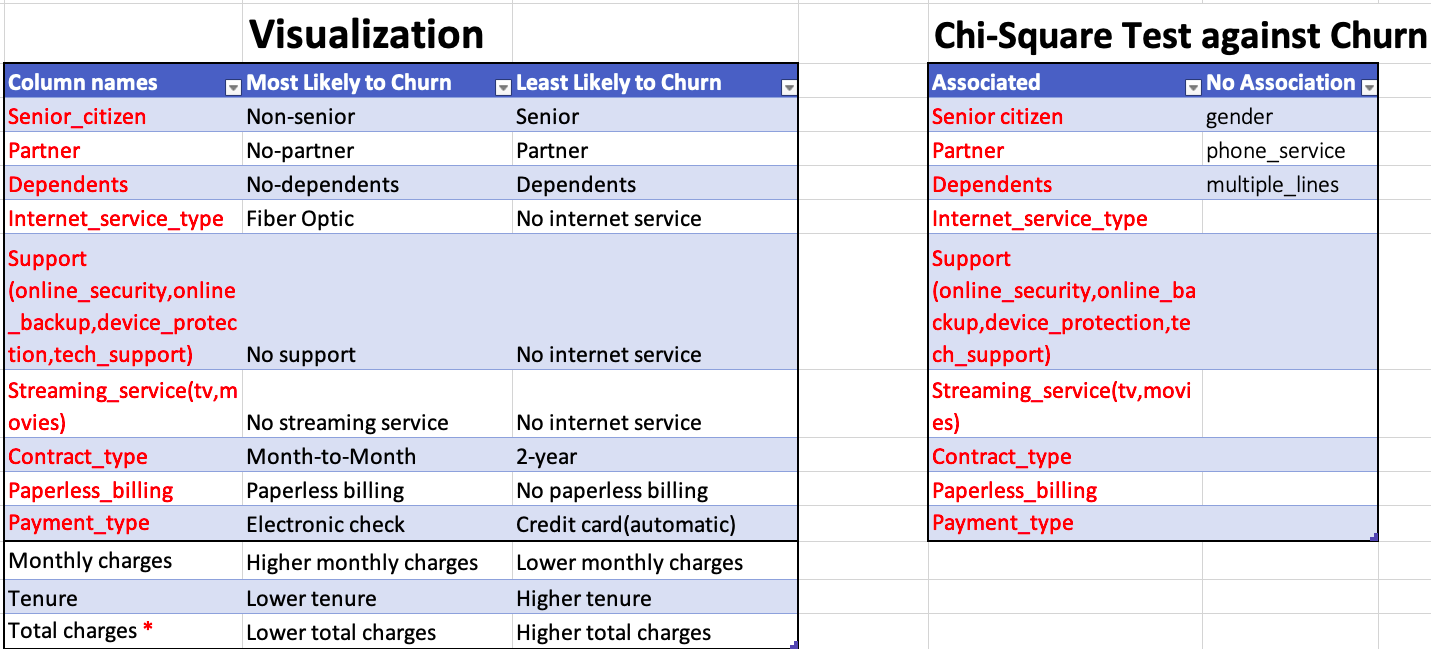

- '*' 'total_charges' seems to have a spurious correlation with churn status

In [236]:
categorical_columns = ['gender','senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service_type', 'online_security',
                        'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'paperless_billing', 'payment_type']


print(len(categorical_columns))

16


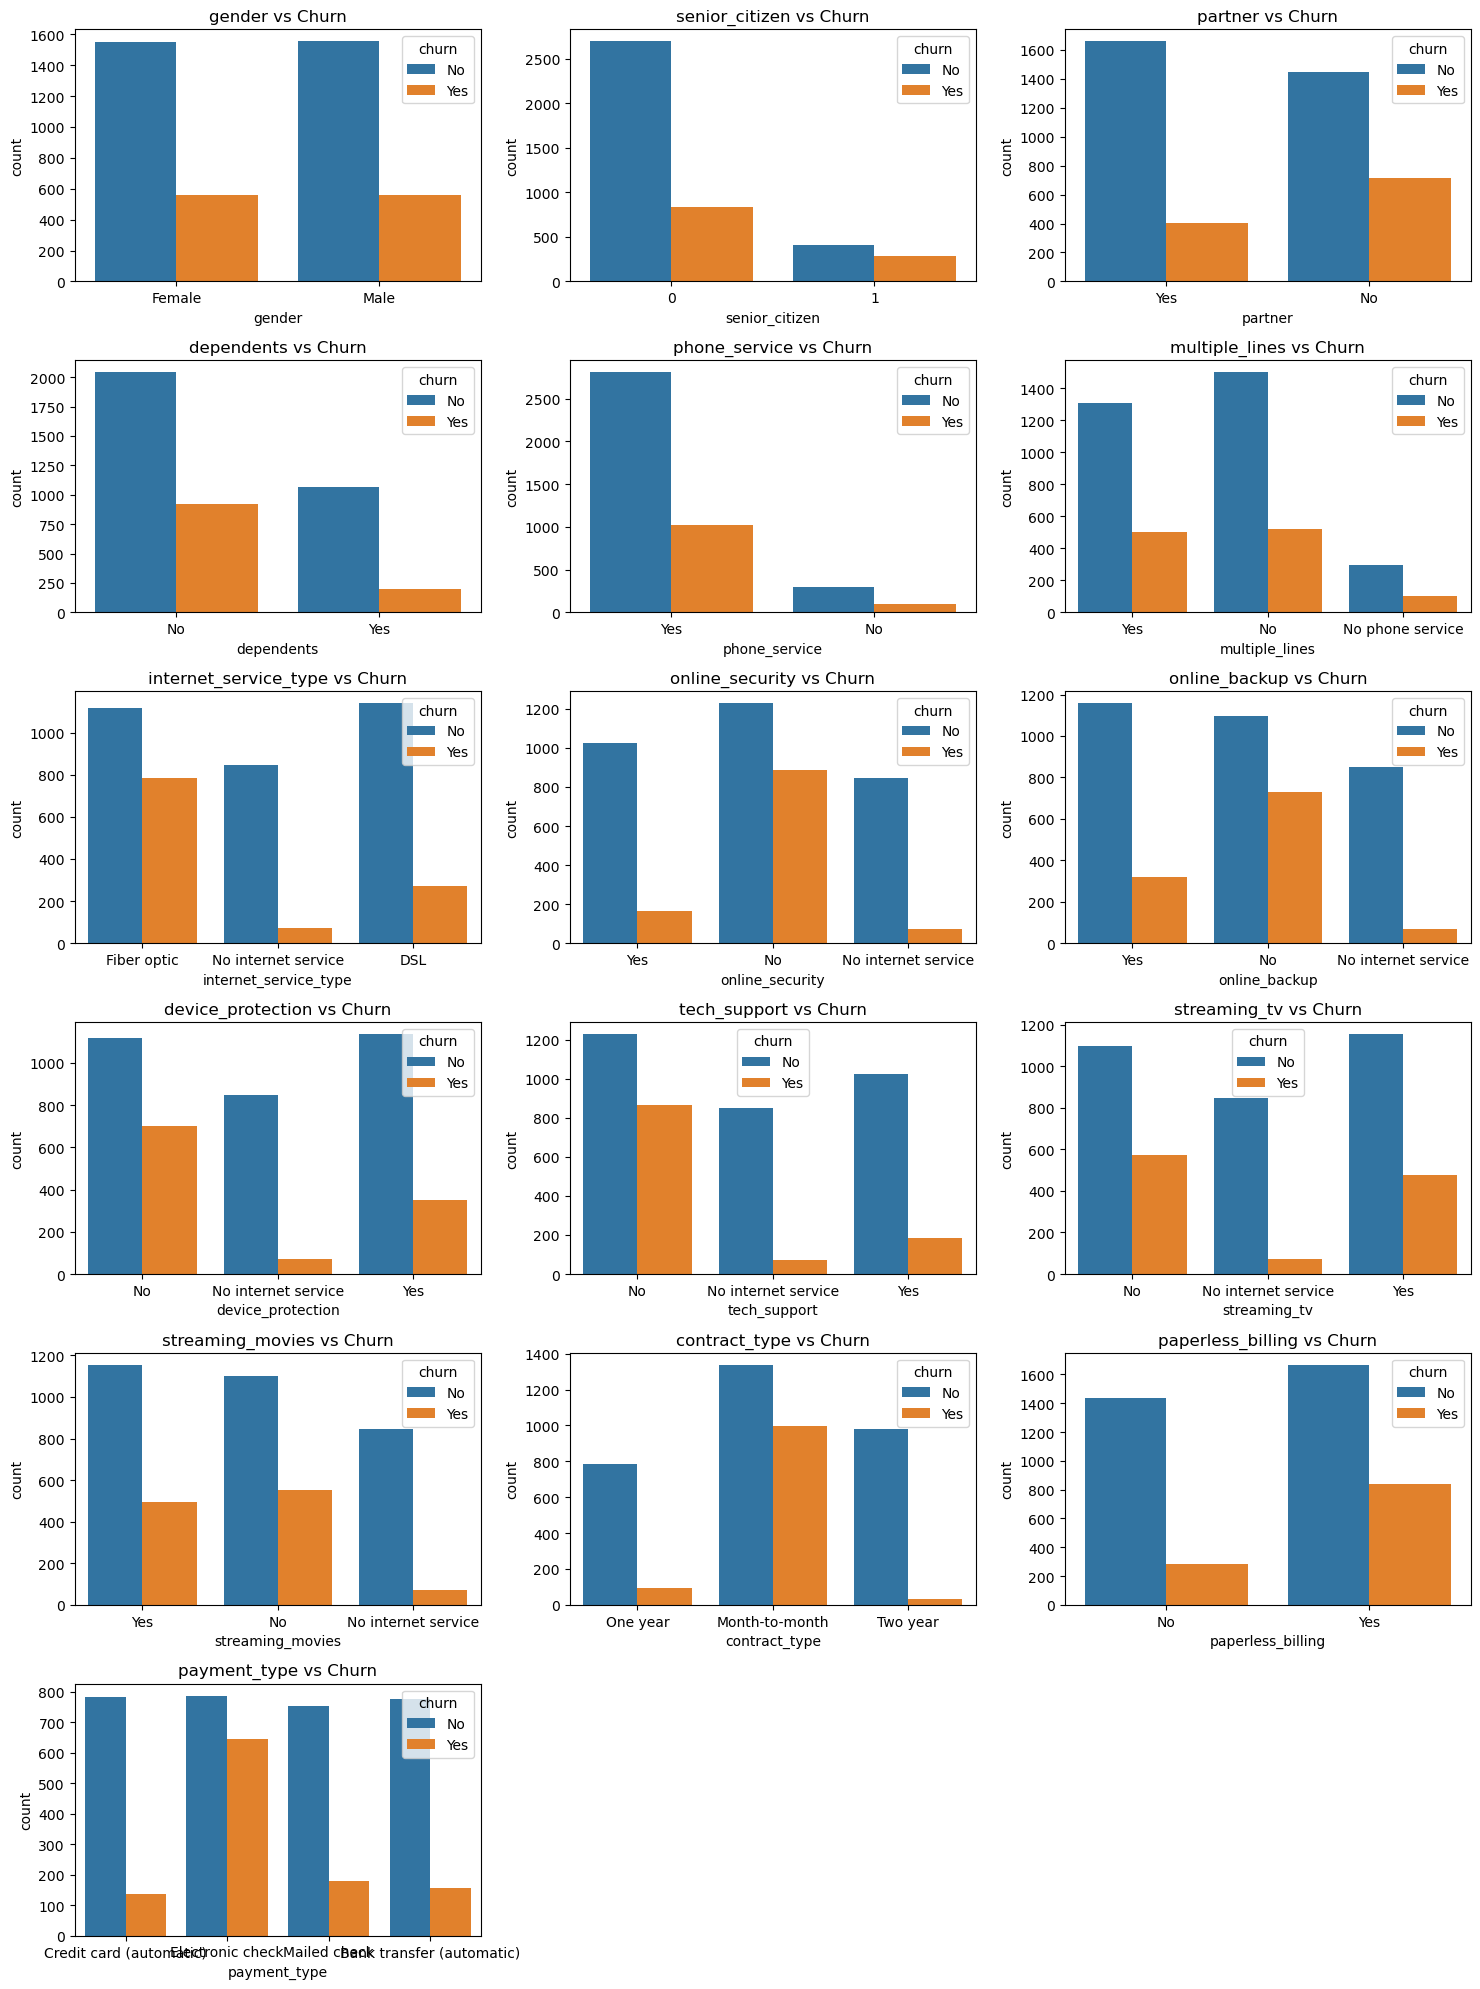

In [237]:
# fig means entire figure, axes is the array of subplots
fig, axes = plt.subplots(nrows=6, ncols=3, 
                         figsize=(15,20))

# Flatten the axes array
axes = axes.flatten()

# Plot each categorical column against churn
# i represents index, column represents columns
# enumerate in order to generate titles
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='churn', data=train, ax=axes[i])
    axes[i].set_title(f'{column} vs Churn')

# Remove empty subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [273]:
from scipy.stats import chi2_contingency
for column in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(train[column], train['churn'])

    # Perform chi-square test
    chi2, p,degf, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-square test for {column} against churn:")
    print(f"Chi2 statistic: {chi2}")
    print(f"P-value: {p}")

    # Check if the p-value is less than the significance level (e.g., 0.05)
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis. There is evidence of association between", column, "and churn.")
    else:
        print("Fail to reject the null hypothesis. There is not enough evidence of association between", column, "and churn.")

    print("\n" + "="*50 + "\n")

Chi-square test for gender against churn:
Chi2 statistic: 2.4733283637992e-05
P-value: 0.996031931504371
Fail to reject the null hypothesis. There is not enough evidence of association between gender and churn.


Chi-square test for senior_citizen against churn:
Chi2 statistic: 90.8791641507161
P-value: 1.5271938515844278e-21
Reject the null hypothesis. There is evidence of association between senior_citizen and churn.


Chi-square test for partner against churn:
Chi2 statistic: 97.15376877725984
P-value: 6.414706667955165e-23
Reject the null hypothesis. There is evidence of association between partner and churn.


Chi-square test for dependents against churn:
Chi2 statistic: 102.24217978518547
P-value: 4.91325418673439e-24
Reject the null hypothesis. There is evidence of association between dependents and churn.


Chi-square test for phone_service against churn:
Chi2 statistic: 0.36450167846667736
P-value: 0.5460166860258362
Fail to reject the null hypothesis. There is not enough evid

> # Question 4: what are the top 3 variables that affect churn rate?

In [ ]:
# Multi-variate analysis

# References: 
    
TechSee Augmented Vision Ltd. (2022, December 31). Reasons for customer churn in Telecoms [Survey Results] | TechSee. TechSee. https://techsee.me/resources/reports/2019-telecom-churn-survey/#:~:text=Primary%20reasons%20for%20churn%20in%20telecoms&text=Customers%20canceled%20their%20contracts%20for,or%20had%20a%20negative%20approach)